In [11]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
from sklearn.model_selection import train_test_split

In [2]:
#Load data
data = pd.read_csv("creditcard.csv")
data.head

<bound method NDFrame.head of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.

In [3]:
print(data.shape)
print(data.describe())

(284807, 31)
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.918649e-15  5.682686e-16 -8.761736e-15  2.811118e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552103e-15  2.040130e-15 -1.698953e-15 -1.893285e-16 -3.147640e-15   
std    1.380247e+00  1.332271

In [5]:
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]

outlierFract = float(len(fraud))/float(len(valid))
print(outlierFract)
print("Fraud cases: ", len(fraud))
print('Valid Transactions: ', len(valid))

0.0017304750013189597
Fraud cases:  492
Valid Transactions:  284315


We can see only 0.17% of the data is fraudulet. This shows how highly unbalanced the data is. I am going to apply models on the unbalanced data first and see the accuarcy, if the accuracy is bad then I will come back and balance the dataset.

In [6]:
print('Amount details of the Fraud transactions')
fraud.Amount.describe()

Amount details of the Fraud transactions


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [7]:
print('Amount details of valid transactons')
valid.Amount.describe()

Amount details of valid transactons


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

We can see that the average money for the fraudulent transaction is more making this a curical problem to deal with.

<function matplotlib.pyplot.show(close=None, block=None)>

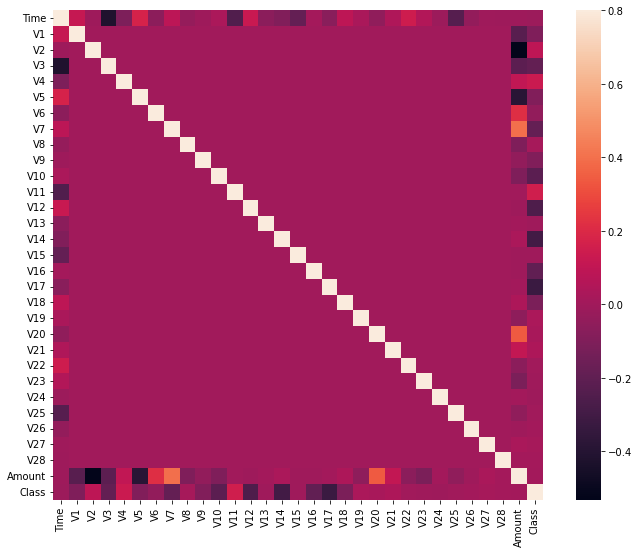

In [8]:
cormat = data.corr()
fig = plt.figure(figsize = (12,9))
sns.heatmap(cormat, vmax = 0.8,square= True)
plt.show

In the heat map we can see the features do not correlate with eachother but as you can see there is corralation with the versions and the ammounts. For example V2 and the ammount have a very high negative correlation.

In [9]:
#Spliting our data
X = data.drop(['Class'], axis = 1)
Y = data['Class']
print(X.shape)
print(Y.shape)
x = X.values
y = Y.values

(284807, 30)
(284807,)


In [16]:
#split into train and test sets
xTrain, xTest, yTrain, yTest = train_test_split(x,y,test_size=0.2,random_state=42)

In [17]:
from sklearn.ensemble import RandomForestClassifier
#Fit data with Random forest Model
rfc = RandomForestClassifier()
rfc.fit(xTrain, yTrain)
#predictions
ypredict = rfc.predict(xTest)

In [18]:
#Evaluation 
from sklearn.metrics import classification_report, accuracy_score 
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix

nOutliers = len(fraud)
n_errors = (ypredict != yTest).sum()
print('the model used is Random Forest Classifier')

accuracy = accuracy_score(yTest,ypredict)
print('Accuracy: ', accuracy)

precision = precision_score(yTest,ypredict)
print('Precision: ', precision)

recall = recall_score(yTest,ypredict)
print('Recal Score: ', recall)

f1 = f1_score(yTest,ypredict)
print('F1 score: ',f1)

MCC = matthews_corrcoef(yTest,ypredict)
print('Matthews correlation coefficient: ',MCC)

the model used is Random Forest Classifier
Accuracy:  0.9995786664794073
Precision:  0.9743589743589743
Recal Score:  0.7755102040816326
F1 score:  0.8636363636363635
Matthews correlation coefficient:  0.8690748763736589


We can see that with the unbalanced data set our model produces good results so we dont need to go and balance it

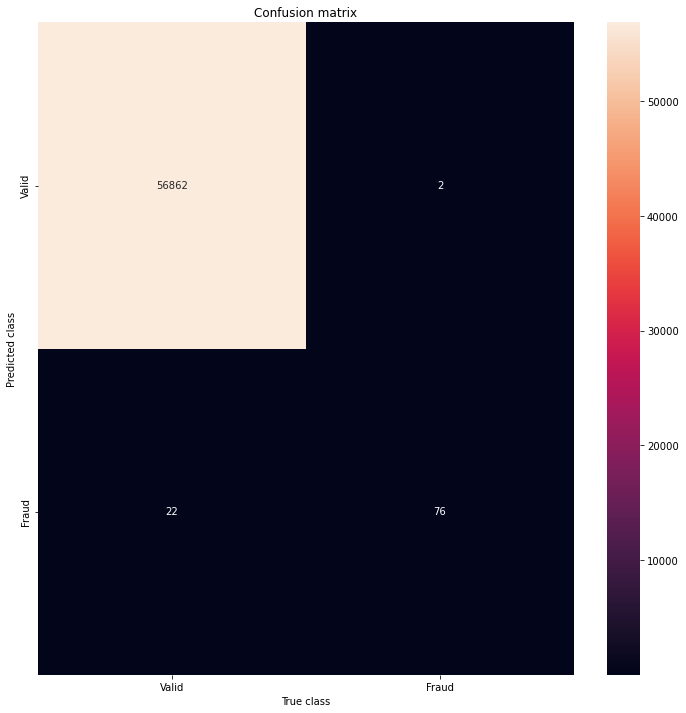

In [20]:
#visualize with the confusion matrix 
labels = ['Valid','Fraud']
matrix = confusion_matrix(yTest,ypredict)
plt.figure(figsize = (12,12))
sns.heatmap(matrix, xticklabels= labels,yticklabels=labels,annot = True,fmt='d')
plt.title('Confusion matrix')
plt.xlabel('True class')
plt.ylabel('Predicted class')
plt.show()